## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  48.568356   958.285802  0.138156   4.120023  1.076150
1  71.780304  1440.168175  0.157024  10.107456  1.335981
2  16.887401   730.481367  0.153448   1.603049  1.268333
3  67.978611   565.084252  0.004417   6.235064 -0.103752
4  32.628098  1634.417114  0.733112   2.087589  1.670326


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8366670	total: 58.3ms	remaining: 58.3s
1:	learn: 0.8278369	total: 59ms	remaining: 29.5s
2:	learn: 0.8212281	total: 59.5ms	remaining: 19.8s
3:	learn: 0.8140324	total: 60ms	remaining: 14.9s
4:	learn: 0.8064801	total: 61.1ms	remaining: 12.2s
5:	learn: 0.7998536	total: 61.8ms	remaining: 10.2s
6:	learn: 0.7936136	total: 62.9ms	remaining: 8.93s
7:	learn: 0.7856058	total: 63.5ms	remaining: 7.87s
8:	learn: 0.7784885	total: 63.9ms	remaining: 7.04s
9:	learn: 0.7717695	total: 64.3ms	remaining: 6.37s
10:	learn: 0.7650340	total: 64.8ms	remaining: 5.83s
11:	learn: 0.7587670	total: 65.2ms	remaining: 5.37s
12:	learn: 0.7508162	total: 65.5ms	remaining: 4.97s
13:	learn: 0.7434725	total: 65.9ms	remaining: 4.64s
14:	learn: 0.7366465	total: 66.3ms	remaining: 4.35s
15:	learn: 0.7308852	total: 66.6ms	remaining: 4.1s
16:	learn: 0.7231711	total: 67ms	remaining: 3.87s
17:	learn: 0.7163329	total: 67.4ms	remaining: 3.67s
18:	learn: 0.7096545	total: 67.7ms	remaining: 3.5s


118:	learn: 0.3298733	total: 104ms	remaining: 772ms
119:	learn: 0.3276670	total: 105ms	remaining: 768ms
120:	learn: 0.3255647	total: 105ms	remaining: 763ms
121:	learn: 0.3239867	total: 105ms	remaining: 759ms
122:	learn: 0.3219524	total: 106ms	remaining: 754ms
123:	learn: 0.3196979	total: 106ms	remaining: 749ms
124:	learn: 0.3182457	total: 107ms	remaining: 746ms
125:	learn: 0.3162843	total: 107ms	remaining: 743ms
126:	learn: 0.3148177	total: 108ms	remaining: 739ms
127:	learn: 0.3126410	total: 108ms	remaining: 735ms
128:	learn: 0.3106731	total: 108ms	remaining: 732ms
129:	learn: 0.3090916	total: 109ms	remaining: 728ms
130:	learn: 0.3068206	total: 109ms	remaining: 724ms
131:	learn: 0.3044734	total: 109ms	remaining: 720ms
132:	learn: 0.3029307	total: 110ms	remaining: 715ms
133:	learn: 0.3013678	total: 110ms	remaining: 712ms
134:	learn: 0.2998649	total: 110ms	remaining: 708ms
135:	learn: 0.2981758	total: 111ms	remaining: 704ms
136:	learn: 0.2960405	total: 111ms	remaining: 700ms
137:	learn: 

326:	learn: 0.1300912	total: 183ms	remaining: 377ms
327:	learn: 0.1295884	total: 183ms	remaining: 376ms
328:	learn: 0.1290538	total: 184ms	remaining: 375ms
329:	learn: 0.1287048	total: 184ms	remaining: 374ms
330:	learn: 0.1283813	total: 184ms	remaining: 373ms
331:	learn: 0.1279833	total: 185ms	remaining: 372ms
332:	learn: 0.1277342	total: 185ms	remaining: 371ms
333:	learn: 0.1272462	total: 185ms	remaining: 369ms
334:	learn: 0.1269169	total: 186ms	remaining: 368ms
335:	learn: 0.1266005	total: 186ms	remaining: 367ms
336:	learn: 0.1262500	total: 186ms	remaining: 366ms
337:	learn: 0.1260103	total: 187ms	remaining: 365ms
338:	learn: 0.1256309	total: 187ms	remaining: 365ms
339:	learn: 0.1252828	total: 187ms	remaining: 364ms
340:	learn: 0.1247095	total: 188ms	remaining: 363ms
341:	learn: 0.1241648	total: 188ms	remaining: 362ms
342:	learn: 0.1238374	total: 189ms	remaining: 361ms
343:	learn: 0.1232943	total: 189ms	remaining: 360ms
344:	learn: 0.1227725	total: 189ms	remaining: 359ms
345:	learn: 

586:	learn: 0.0591959	total: 281ms	remaining: 198ms
587:	learn: 0.0591250	total: 282ms	remaining: 197ms
588:	learn: 0.0588446	total: 282ms	remaining: 197ms
589:	learn: 0.0586981	total: 282ms	remaining: 196ms
590:	learn: 0.0585539	total: 283ms	remaining: 196ms
591:	learn: 0.0582287	total: 283ms	remaining: 195ms
592:	learn: 0.0581596	total: 283ms	remaining: 194ms
593:	learn: 0.0580184	total: 284ms	remaining: 194ms
594:	learn: 0.0576990	total: 284ms	remaining: 193ms
595:	learn: 0.0575602	total: 285ms	remaining: 193ms
596:	learn: 0.0573979	total: 285ms	remaining: 192ms
597:	learn: 0.0570846	total: 285ms	remaining: 192ms
598:	learn: 0.0568323	total: 286ms	remaining: 191ms
599:	learn: 0.0565844	total: 286ms	remaining: 191ms
600:	learn: 0.0563407	total: 286ms	remaining: 190ms
601:	learn: 0.0561012	total: 287ms	remaining: 190ms
602:	learn: 0.0557964	total: 287ms	remaining: 189ms
603:	learn: 0.0555617	total: 288ms	remaining: 189ms
604:	learn: 0.0554335	total: 288ms	remaining: 188ms
605:	learn: 

779:	learn: 0.0367119	total: 360ms	remaining: 102ms
780:	learn: 0.0366804	total: 361ms	remaining: 101ms
781:	learn: 0.0365476	total: 361ms	remaining: 101ms
782:	learn: 0.0364231	total: 361ms	remaining: 100ms
783:	learn: 0.0362960	total: 362ms	remaining: 99.6ms
784:	learn: 0.0361684	total: 362ms	remaining: 99.2ms
785:	learn: 0.0361398	total: 363ms	remaining: 98.7ms
786:	learn: 0.0361077	total: 363ms	remaining: 98.2ms
787:	learn: 0.0360799	total: 363ms	remaining: 97.8ms
788:	learn: 0.0359042	total: 364ms	remaining: 97.3ms
789:	learn: 0.0358729	total: 364ms	remaining: 96.8ms
790:	learn: 0.0357001	total: 364ms	remaining: 96.3ms
791:	learn: 0.0356731	total: 365ms	remaining: 95.8ms
792:	learn: 0.0355033	total: 365ms	remaining: 95.4ms
793:	learn: 0.0354724	total: 366ms	remaining: 94.9ms
794:	learn: 0.0353503	total: 366ms	remaining: 94.4ms
795:	learn: 0.0353199	total: 366ms	remaining: 93.9ms
796:	learn: 0.0351538	total: 367ms	remaining: 93.4ms
797:	learn: 0.0351239	total: 367ms	remaining: 92.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

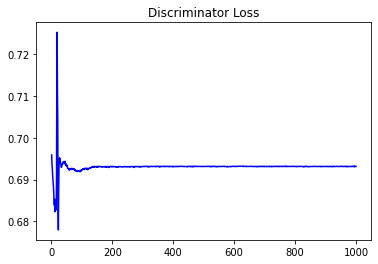

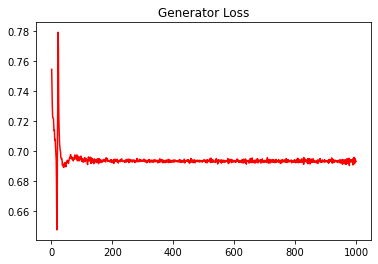

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.676385142557777


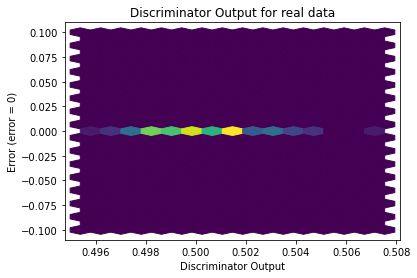

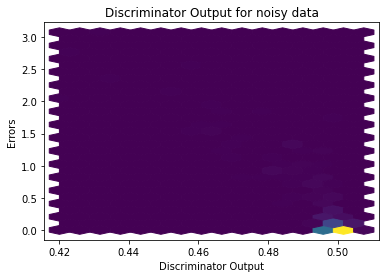

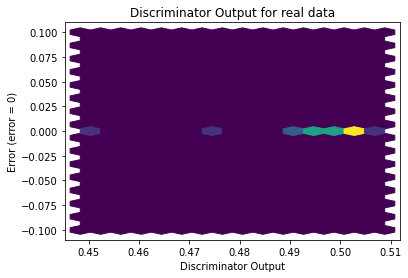

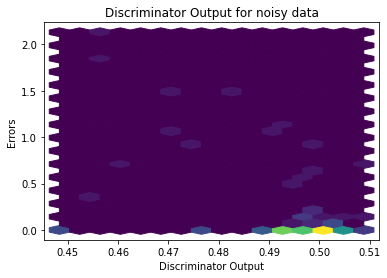

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


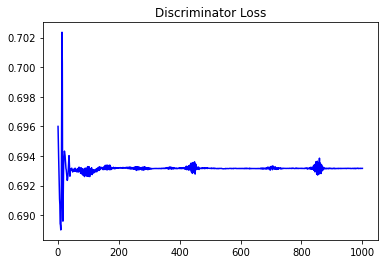

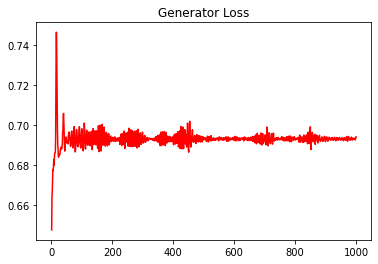

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.6254522134247216


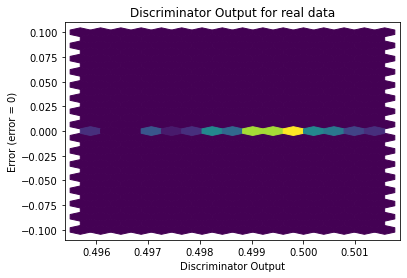

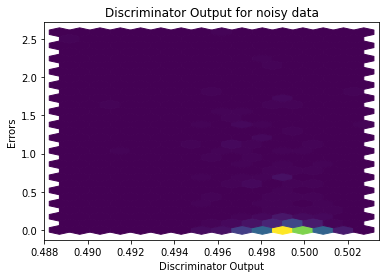

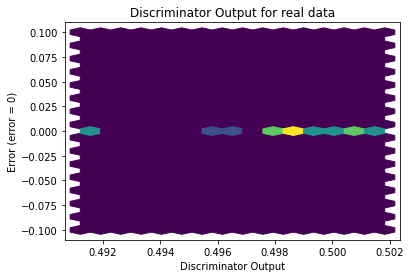

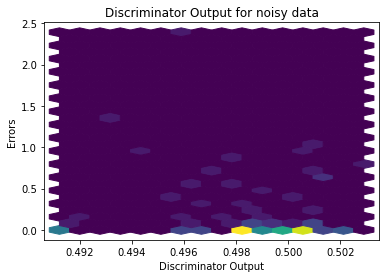

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3558]], requires_grad=True)
